In [1]:
#importing the libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
os.getcwd()

'C:\\Users\\V--pin\\Desktop\\Learnbay Course Material\\MyBatchCourseMaterial\\Projects\\E-Commerce by Sundaram'

In [3]:
#import the dataset
data = pd.read_excel('E-com_Data.xlsx')

In [4]:
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [5]:
data.shape

(537979, 12)

In [6]:
#data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [7]:
data.describe()

,CustomerID,InvoieNo,Quantity,price per Unit,Price,Cancelled_status,Sold as set
count,404189.000000,537979.000000,537979.000000,537979.000000,537979.000000,8345.0,0.0
mean,2181.909035,385017.572063,9.343339,378.339062,2161.414593,1.0,NaN
std,1252.681881,13426.052649,27.623322,440.048823,4538.487177,0.0,NaN
min,2.000000,361429.000000,-2003.000000,1.000000,-10152.000000,1.0,NaN
25%,1207.000000,372961.000000,1.000000,169.000000,451.000000,1.0,NaN
50%,2078.000000,385706.000000,3.000000,261.000000,1194.000000,1.0,NaN
75%,3291.000000,396873.000000,10.000000,456.000000,2232.000000,1.0,NaN
max,4372.000000,406651.000000,3186.000000,64973.000000,90400.000000,1.0,NaN


In [8]:
#checking missing data
data.isna().sum()/len(data)*100

CustomerID            24.869000
Item Code              0.000000
InvoieNo               0.000000
Date of purchase       0.000000
Quantity               0.000000
Time                   0.000000
price per Unit         0.000000
Price                  0.000000
Shipping Location      0.000000
Cancelled_status      98.448824
Reason of return      99.999442
Sold as set          100.000000
dtype: float64

In [9]:
#unique data
data.nunique()

CustomerID            4349
Item Code             4009
InvoieNo             24928
Date of purchase       381
Quantity               462
Time                   770
price per Unit        3479
Price                16327
Shipping Location       20
Cancelled_status         1
Reason of return         2
Sold as set              0
dtype: int64

In [10]:

#duplicate data
data.loc[data.duplicated(),:]


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
61202,4043.0,15819,403353,2017-12-02,1,14:07:00,447.0,447.0,Location 36,NaN,NaN,NaN
70587,3984.0,15422,405579,2017-12-09,24,14:09:00,77.0,1848.0,Location 36,NaN,NaN,NaN
84823,3828.0,14519,398139,2017-10-31,1,14:04:00,85.0,85.0,Location 36,NaN,NaN,NaN
120521,3384.0,15121,380588,2017-06-11,1,11:37:00,298.0,298.0,Location 36,NaN,NaN,NaN
182786,2607.0,15660,393225,2017-09-30,1,12:31:00,484.0,484.0,Location 36,NaN,NaN,NaN
248215,1852.0,15614,382863,2017-07-02,12,09:53:00,221.0,2652.0,Location 36,NaN,NaN,NaN
310310,1291.0,13958,368695,2017-02-14,2,16:17:00,298.0,596.0,Location 36,NaN,NaN,NaN
325175,1076.0,2020,405755,2017-12-13,12,15:48:00,58.0,696.0,Location 36,NaN,NaN,NaN
414854,NaN,2020,386281,2017-07-31,1,17:09:00,104.0,104.0,Location 36,NaN,NaN,NaN


In [11]:
#drop duplicates data

data = data.drop_duplicates(ignore_index = True)
data.shape

(537970, 12)

In [12]:
#droping missing data in customer id

data = data.dropna(subset = ['CustomerID'])

In [13]:
data.shape

(404181, 12)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404181 entries, 0 to 537940
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404181 non-null  float64       
 1   Item Code          404181 non-null  object        
 2   InvoieNo           404181 non-null  int64         
 3   Date of purchase   404181 non-null  datetime64[ns]
 4   Quantity           404181 non-null  int64         
 5   Time               404181 non-null  object        
 6   price per Unit     404181 non-null  float64       
 7   Price              404181 non-null  float64       
 8   Shipping Location  404181 non-null  object        
 9   Cancelled_status   8183 non-null    float64       
 10  Reason of return   0 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 40.1+ MB


In [15]:
data = data.iloc[:,0:9]
data.head()

,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1


In [16]:
data['Date'] = pd.to_datetime(data['Date of purchase'])
data['Date_1'] = data['Date']

In [17]:
#last date
max(data['Date of purchase'])

Timestamp('2017-12-19 00:00:00')

In [18]:
latest_date = dt.datetime(2017, 12, 20, 0, 0)

In [19]:
#Create RMF  model by each customer

RMFScore = data.groupby('CustomerID').agg({'Date_1': lambda x : (latest_date - x.max()).days,
                                         'Date': lambda x: x.count(),
                                         'Price': lambda x : x.sum()}) 

In [20]:
RMFScore['Date'] = RMFScore['Date'].astype(int)
RMFScore.rename(columns={"Date_1":"Recency","Date":"Frequency","Price":"Monetory"},
               inplace =  True)


In [21]:
RMFScore.reset_index()

,CustomerID,Recency,Frequency,Monetory
0,2.0,4,182,553704.0
1,3.0,77,27,257404.0
2,4.0,19,72,176613.0
3,5.0,311,16,41976.0
4,6.0,37,84,151822.0
...,...,...,...,...
4344,4368.0,278,10,20480.0
4345,4369.0,181,7,10774.0
4346,4370.0,9,13,24962.0
4347,4371.0,4,754,280608.0


In [22]:
#EDA Part

RMFScore.Recency.describe()

count    4349.000000
mean       93.299379
std       100.701315
min         1.000000
25%        18.000000
50%        51.000000
75%       144.000000
max       381.000000
Name: Recency, dtype: float64

In [23]:
#split the data into four segemnt usning quantile method
quantiles = RMFScore.quantile(q=[0.25,0.50,0.75])
quantiles = quantiles.to_dict()

In [24]:
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 42.0, 0.75: 101.0},
 'Monetory': {0.25: 38148.0, 0.5: 83655.0, 0.75: 205612.0}}

In [25]:
#create own function to define R, F , M Segments

def RScoring(x, p ,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75] :
        return 2
    else :
        return 1

In [26]:
RMFScore['R'] = RMFScore['Recency'].apply(RScoring , args = ('Recency', quantiles))
RMFScore['F'] = RMFScore['Frequency'].apply(FnMScoring , args = ('Frequency', quantiles))
RMFScore['M'] = RMFScore['Monetory'].apply(FnMScoring , args = ('Monetory', quantiles))

In [27]:
RMFScore

,Recency,Frequency,Monetory,R,F,M
CustomerID,,,,,,
2.0,4,182,553704.0,1,1,1
3.0,77,27,257404.0,3,3,1
4.0,19,72,176613.0,2,2,2
5.0,311,16,41976.0,4,4,3
6.0,37,84,151822.0,2,2,2
...,...,...,...,...,...,...
4368.0,278,10,20480.0,4,4,4
4369.0,181,7,10774.0,4,4,4
4370.0,9,13,24962.0,1,4,4


In [28]:
RMFScore['RMFGroup'] = RMFScore.R.map(str) + RMFScore.F.map(str) + RMFScore.M.map(str)

In [29]:
RMFScore

,Recency,Frequency,Monetory,R,F,M,RMFGroup
CustomerID,,,,,,,
2.0,4,182,553704.0,1,1,1,111
3.0,77,27,257404.0,3,3,1,331
4.0,19,72,176613.0,2,2,2,222
5.0,311,16,41976.0,4,4,3,443
6.0,37,84,151822.0,2,2,2,222
...,...,...,...,...,...,...,...
4368.0,278,10,20480.0,4,4,4,444
4369.0,181,7,10774.0,4,4,4,444
4370.0,9,13,24962.0,1,4,4,144


In [30]:
RMFScore['RMFScore'] = RMFScore[['R','M','F']].sum(axis=1)

In [31]:
RMFScore

,Recency,Frequency,Monetory,R,F,M,RMFGroup,RMFScore
CustomerID,,,,,,,,
2.0,4,182,553704.0,1,1,1,111,3
3.0,77,27,257404.0,3,3,1,331,7
4.0,19,72,176613.0,2,2,2,222,6
5.0,311,16,41976.0,4,4,3,443,11
6.0,37,84,151822.0,2,2,2,222,6
...,...,...,...,...,...,...,...,...
4368.0,278,10,20480.0,4,4,4,444,12
4369.0,181,7,10774.0,4,4,4,444,12
4370.0,9,13,24962.0,1,4,4,144,9


In [32]:
# Assign Loyality level to each customer

Loyalty_level = ['Diamond', 'Platinum', 'Gold', 'Silver']

score_cuts = pd.qcut(RMFScore.RMFScore, q = 4, labels = Loyalty_level)

RMFScore['RMF_Loyalty_Level'] = score_cuts.values
RMFScore.reset_index().head(20)

,CustomerID,Recency,Frequency,Monetory,R,F,M,RMFGroup,RMFScore,RMF_Loyalty_Level
0,2.0,4,182,553704.0,1,1,1,111,3,Diamond
1,3.0,77,27,257404.0,3,3,1,331,7,Platinum
2,4.0,19,72,176613.0,2,2,2,222,6,Platinum
3,5.0,311,16,41976.0,4,4,3,443,11,Silver
4,6.0,37,84,151822.0,2,2,2,222,6,Platinum
5,7.0,208,4,9410.0,4,4,4,444,12,Silver
6,8.0,233,58,135550.0,4,2,2,422,8,Platinum
7,9.0,215,13,65832.0,4,4,3,443,11,Silver
8,10.0,25,58,331601.0,2,2,1,221,5,Diamond
9,11.0,34,131,771439.0,2,1,1,211,4,Diamond


In [33]:
#validate the data for RMFGroup = 111

RMFScore[RMFScore['RMFGroup']=='111'].sort_values('Monetory',ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetory,R,F,M,RMFGroup,RMFScore,RMF_Loyalty_Level
0,1704.0,3,2053,35536194.0,1,1,1,111,3,Diamond
1,1896.0,2,5874,17743855.0,1,1,1,111,3,Diamond
2,1346.0,10,1395,12647317.0,1,1,1,111,3,Diamond
3,3802.0,3,1060,12319439.0,1,1,1,111,3,Diamond
4,4234.0,3,322,10654918.0,1,1,1,111,3,Diamond
5,1006.0,5,571,9351019.0,1,1,1,111,3,Diamond
6,3203.0,5,269,8102167.0,1,1,1,111,3,Diamond
7,2193.0,1,2489,7966054.0,1,1,1,111,3,Diamond
8,1448.0,5,1638,7892625.0,1,1,1,111,3,Diamond
9,3759.0,10,263,7545149.0,1,1,1,111,3,Diamond


In [34]:
RMFScore[RMFScore['RMFGroup']=='444'].sort_values('Monetory',ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetory,R,F,M,RMFGroup,RMFScore,RMF_Loyalty_Level
0,3339.0,369,13,38147.0,4,4,4,444,12,Silver
1,1846.0,149,13,38098.0,4,4,4,444,12,Silver
2,3929.0,264,16,37982.0,4,4,4,444,12,Silver
3,1466.0,164,12,37517.0,4,4,4,444,12,Silver
4,3245.0,176,16,37501.0,4,4,4,444,12,Silver
5,3820.0,191,14,37230.0,4,4,4,444,12,Silver
6,2677.0,304,11,37072.0,4,4,4,444,12,Silver
7,3483.0,269,5,37026.0,4,4,4,444,12,Silver
8,4297.0,250,17,37002.0,4,4,4,444,12,Silver
9,2927.0,264,1,37000.0,4,4,4,444,12,Silver


In [35]:
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RMFScore['Monetory'] = [handle_neg_n_zero(x) for x in RMFScore.Monetory]

In [36]:
new_data = RMFScore[['Recency', 'Frequency', 'Monetory']]

In [37]:
new_data.head()

,Recency,Frequency,Monetory
CustomerID,,,
2.0,4,182,553704.0
3.0,77,27,257404.0
4.0,19,72,176613.0
5.0,311,16,41976.0
6.0,37,84,151822.0


# Feature Scaling

<AxesSubplot:ylabel='Monetory'>

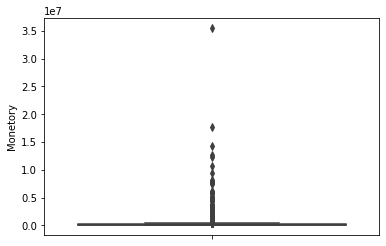

In [38]:
sns.boxplot(y = 'Monetory', data = RMFScore)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)
scaled_data

array([[-0.88687668,  0.38379456,  0.37766904],
       [-0.16187726, -0.28413542,  0.03198725],
       [-0.73790419, -0.09022026, -0.0622685 ],
       ...,
       [-0.83721918, -0.34446458, -0.23919388],
       [-0.88687668,  2.84867167,  0.05905846],
       [-0.48961672, -0.09883872,  0.03830589]])

In [40]:
scaled_data = pd.DataFrame(scaled_data , index = RMFScore.index,columns = new_data.columns)

In [41]:
scaled_data.head()

,Recency,Frequency,Monetory
CustomerID,,,
2.0,-0.886877,0.383795,0.377669
3.0,-0.161877,-0.284135,0.031987
4.0,-0.737904,-0.090220,-0.062268
5.0,2.162093,-0.331537,-0.219344
6.0,-0.559137,-0.038510,-0.091191


# Build Clustering Model

In [42]:
from sklearn.cluster import KMeans

In [43]:
sum_of_sq_dist = {}

for k in range(1,15):
    km = KMeans(n_clusters = k,init = 'k-means++', max_iter=500)
    km.fit(scaled_data)
    sum_of_sq_dist[k] = km.inertia_

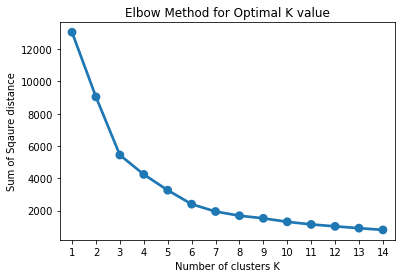

In [44]:
#Visualtion for getting Elbow method(to find optimum K value)

sns.pointplot(x = list(sum_of_sq_dist.keys()),
             y =  list(sum_of_sq_dist.values()))

plt.xlabel('Number of clusters K')
plt.ylabel('Sum of Sqaure distance')
plt.title('Elbow Method for Optimal K value')
plt.show()

In [45]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 500)

In [46]:
y_kmeans = km.fit_predict(scaled_data)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [47]:
RMFScore['Cluster'] = km.labels_
RMFScore= RMFScore.reset_index()

In [48]:
#Look at the centroid per cluster

centroid_df = RMFScore.groupby('Cluster')[['Recency','Frequency','Monetory','CustomerID']].agg({'Recency':'mean',
                                                                                               'Frequency':'mean',
                                                                                               'Monetory':'mean',
                                                                                               'CustomerID':'nunique'}).reset_index()

In [49]:
centroid_df = centroid_df.rename(columns = {'CustomerID':'NumBuyers'})


In [50]:
centroid_df['Percent'] = round(centroid_df['NumBuyers']/centroid_df.NumBuyers.sum()*100,2)
centroid_df

,Cluster,Recency,Frequency,Monetory,NumBuyers,Percent
0,0,41.513880,104.111351,2.375417e+05,3242,74.55
1,1,6.818182,1151.818182,1.216187e+07,11,0.25
2,2,2.500000,5889.500000,8.363220e+06,4,0.09
3,3,248.247253,27.860806,5.756997e+04,1092,25.11


In [54]:
centroid_df_1 = RMFScore.groupby('RMF_Loyalty_Level')[['Recency', 'Frequency', 'Monetory','CustomerID']].agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetory':'sum','CustomerID':'nunique'}).reset_index()
centroid_df_1 = centroid_df_1.rename(columns = {'CustomerID':'NumBuyers'})
centroid_df_1

,RMF_Loyalty_Level,Recency,Frequency,Monetory,NumBuyers
0,Diamond,20.287276,230.898517,764912338.0,1281
1,Platinum,64.038081,57.903275,166232803.0,1313
2,Gold,126.173057,24.640415,50303892.1,965
3,Silver,220.167089,10.879747,18761106.0,790


In [55]:
centroid_df_1['Percent'] = round(centroid_df_1['NumBuyers']/centroid_df_1.NumBuyers.sum()*100,2)
centroid_df_1

,RMF_Loyalty_Level,Recency,Frequency,Monetory,NumBuyers,Percent
0,Diamond,20.287276,230.898517,764912338.0,1281,29.46
1,Platinum,64.038081,57.903275,166232803.0,1313,30.19
2,Gold,126.173057,24.640415,50303892.1,965,22.19
3,Silver,220.167089,10.879747,18761106.0,790,18.17


In [56]:
!pip install squarify
import squarify

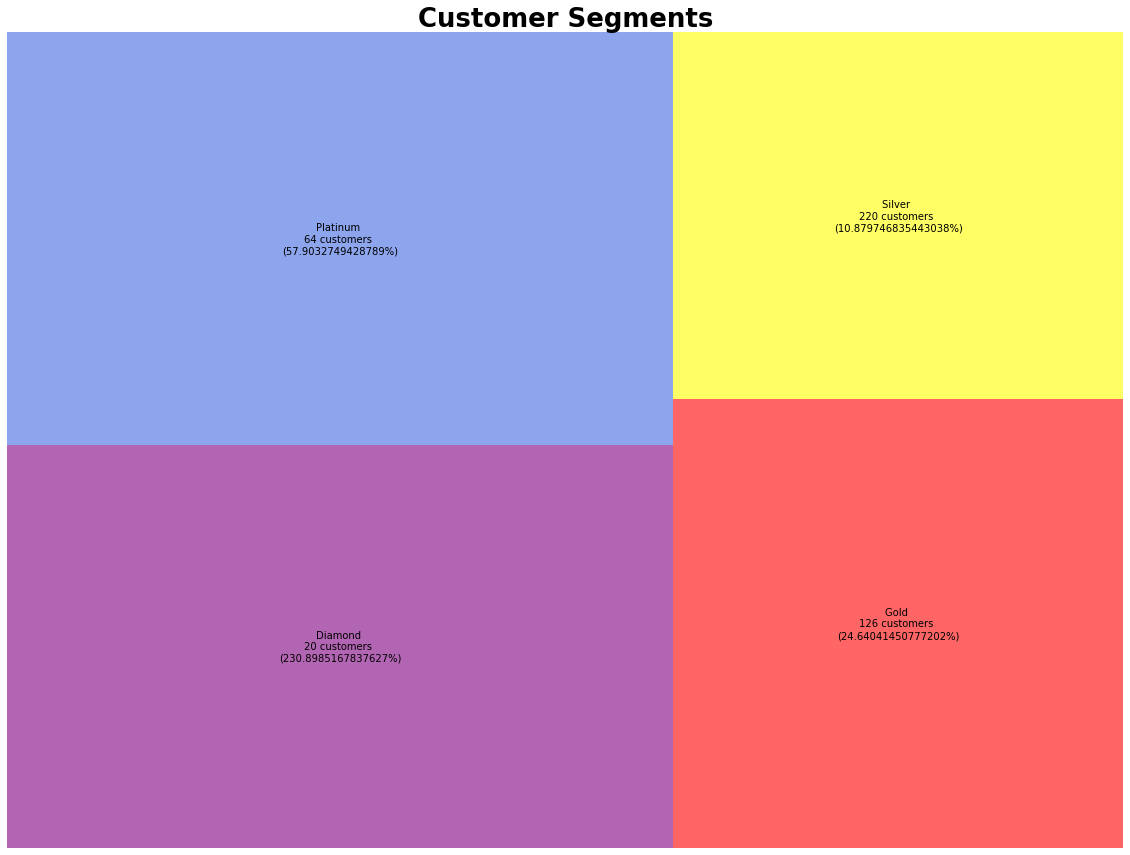

In [59]:
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(20,15)
colors_dict ={'0': 'Purple','1':'royalblue','2':'red','3':'yellow'}

squarify.plot(sizes=centroid_df_1['NumBuyers'],
             color=colors_dict.values(),
              label=['{} \n{:.0f} customers \n({}%)'.format(*centroid_df_1.iloc[i])
             for i in range (0,len(centroid_df_1))],alpha=0.6)

plt.title("Customer Segments", fontsize=26, fontweight="bold")
plt.axis("off")

plt.show()

In [60]:
RMFScore.to_excel('Final_output.xlsx')